# Notes

Here I will present a couple of notes and important concepts that I deem necessary or important. This is, after all, an attempt to teach myself Dynamical Systems so I would like to have these concepts in a handy place.

## Concepts

1. **Flow:** Where is the system moving towards? Given a system

   $$\dot{x} = f(x) $$
   
   the _flow_ will be moving towards the **right** if $\dot{x} > 0$ and towards the **left** if $\dot{x} < 0.$
   
2. **Fixed points:** Every point where there is **no flow**, i.e. $\dot{x} = 0.$ There can be two types of _fixed points:_
    
    a. **Stable:** _flow_ is **towards them**, and they are also called _attractors_ or _sinks._
    
    b. **Unstable:** _flow_ moves **away from them**, and they are also known as _repellers_ or _sources._

### Exercise 2.1.

In the next three exercises, interpret $$\dot{x} = \sin{x}$$ as a _flow_ on the line.

### 2.1.1. Find all the fixed points of the flow.

To answer this question one must find all values that satisfy
$$\dot{x} = \sin{x} = 0,$$
**analytically** it's quite simple, one must solve
$$\sin{x} = 0$$
which has solutions
$$x = n \pi ,\ n \in \mathbb{Z}.$$

In [1]:
# Numerically, one can find the roots and plot them
# First, import the necessary libraries
using Roots
using Plots
using LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [2]:
# Define the function
f(x) = sin(x)
# Find all the zeros of this function within the interval
# x ∈ [-10π, 10π]
solutions = fzeros(f, -5π, 5π)

11-element Array{Float64,1}:
 -15.707963267948966
 -12.566370614359172
  -9.42477796076938 
  -6.283185307179586
  -3.141592653589793
   0.0              
   3.141592653589793
   6.283185307179586
   9.42477796076938 
  12.566370614359172
  15.707963267948966

Here we can see that our analytical result is right, every zero from this function is an integer multiple of $\pi,$ which is the desired result.

We can now plot this in order to see a picture of the expected result.

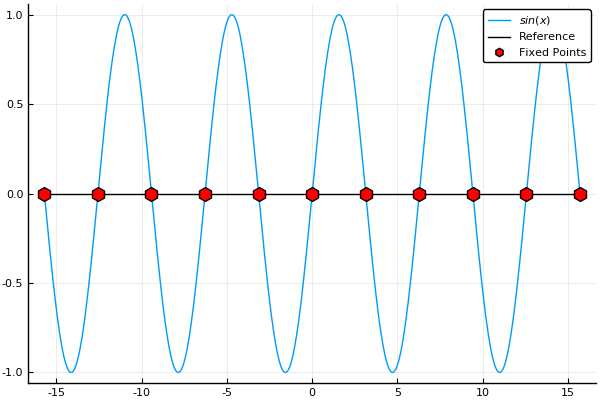

In [3]:
# Now we plot these points
x_vals = range(-5π, 5π, length=500)
plot(x_vals, f.(x_vals), lab = L"sin(x)", leg = :topright)
# This is a black line for reference, just to know where zero is
plot!(x_vals, zeros(length(x_vals)), color = :black, lab = "Reference")
# And these are the fixed points.
scatter!(solutions, zeros(length(solutions)), marker = (:hexagon, 10, :red), lab = "Fixed Points")

Just a quick note about the _fixed points_ we just found. These points are both the **stable** and **unstable** _fixed points_, we are not making a difference between them in this plot.

### 2.1.2. At which points $x$ does the flow have greatest velocity to the right?

Recall that in the book we have the following picture.

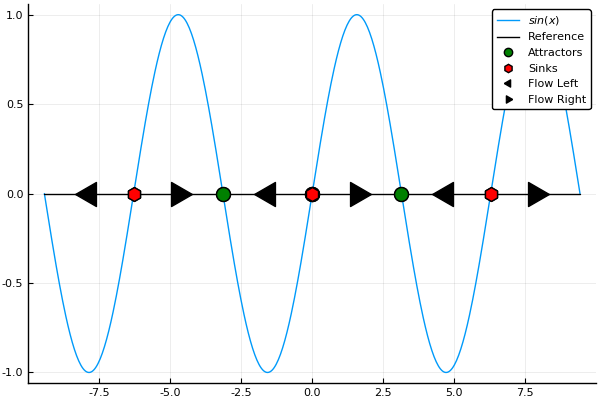

In [4]:
# Create a new set of solutions, a smaller set
solutions = fzeros(f, -3π, 3π)
# Now we plot these points
x_vals = range(-3π, 3π, length=500)
plot(x_vals, f.(x_vals), lab = L"sin(x)", leg = :topright)
# This is a black line for reference, just to know where zero is
plot!(x_vals, zeros(length(x_vals)), color = :black, lab = "Reference")

# Create the "attractors"
attractors = zeros(length(solutions))
for i = 1:length(solutions)
    # We round to nearest to also incluse negative values
   attractors[i] = rem2pi(solutions[i], RoundNearest)
end
scatter!(attractors, zeros(length(solutions)), marker = (:circle, 10, :green), lab = "Attractors")

# And now create the "sinks"
sinks = zeros(length(solutions))
for i = 1:length(solutions)
    # Every other value from the attractors, also rounded to nearest
   sinks[i] = 2*rem2pi(solutions[i], RoundNearest)
end
scatter!(sinks, zeros(length(solutions)), marker = (:hexagon, 10, :red), lab = "Sinks")

# Create arrows to the left
l_arr = range(-5π/2, stop=3π/2, step=2π)
scatter!(l_arr, zeros(length(l_arr)), marker = (:ltriangle, 20, :black), lab = "Flow Left")
# Create arrows to the right
r_arr = range(-3π/2, stop=5π/2, step=2π)
scatter!(r_arr, zeros(length(r_arr)), marker = (:rtriangle, 20, :black), lab = "Flow Right")

Maybe not as pretty as the original, but the idea here is that we must observe the values where the _flow_ has _greatest_ velocity to the **right,** but we have already done this while plotting this graph!

How? Recall that while the _flow_ is leaving a _source_ it starts to speed up quite quickly until it reaches a certain value. Can you spot it? It corresponds to the values where the **right arrows** are **plotted**, thus the **local maximum** within every period.

This is $$x = \frac{\pi}{2}, \frac{3\pi}{2},\frac{5\pi}{2}, \cdots ,$$
and so on, or in a simplified expression,
$$ x = \frac{n \pi}{2},\quad n \in \mathbb{Z}.$$

### 2.1.3. a) Find the flow's acceleration $\ddot{x}$ as a function of $x.$

So part _a_ is quite simple, we are asked to differentiate one time the system in question. From the fundamental rules of calculus we have:
\begin{equation}
\frac{d}{dx} \left( \dot{x} = \sin{x} \right),\quad \text{differentiation is associative} \\
\frac{d}{dx} \dot{x} = \frac{d}{dx} \sin{x},\quad \text{we then apply the chain rule} \\
\ddot{x} = \dot{x} \cos{x}, \quad \text{and substituting back the original equation} \\
\ddot{x} = \sin{x} \cos{x},\quad \text{finally, using}\ 2 \sin{x} \cos{x} = \sin{2x}\ \text{we have} \\
\ddot{x} = \frac{1}{2} \sin{2x}
\end{equation}

In [18]:
# Is it possible to do it in Julia? Yes, at least using SymPy
using SymPy

# First, define the needed symbols
x = Symbol("x")
y = sympy.sin(x)
F = sympy.Function("f")

PyObject f

A quick note here. It turns out that we [_cannot_](https://docs.sympy.org/latest/modules/core.html?highlight=function#derivative) (or maybe I'm wrong all along) create a symbolic derivative when the function depends on another variable. In other words, because we are performing _implicit differentiation_ given a function, SymPy cannot handle this and we must do the chain rule by hand.

In [19]:
# First, we find the first derivative, i.e. the velocity
df = diff(F(x))

d       
──(f(x))
dx      

In [20]:
# We apply the chain rule to the LHS of the equation
chain = diff(y) * df

       d       
cos(x)⋅──(f(x))
       dx      

In [21]:
# We then differentiate once more, and add the chain result
# so we obtain f''(x) - g(x) = 0
res = diff(df) - chain
# And finally we simplify the expression
res.subs(df, y).simplify()

  sin(2⋅x)   d         
- ──────── + ──(sin(x))
     2       dx        

This is the answer we are looking for, nicely formatted in $\LaTeX$. Not bad at all. We cannot readily evaluate this function though, we need to solve the equation in order to do so but there is no need here.

### b) Find the points where the flow has maximum positive acceleration.

This is exactly as before, but now we have a different expression. To see what I mean, we are asked to find all points such that the following expression
$$ \ddot{x} = \frac{1}{2} \sin{2x} = 0 $$
is satisfied. But recall that this is just finding the _fixed points_, and we are asked the **local maximum** within each interval.

First, analitycally we have the following
\begin{equation}
\frac{1}{2} \sin{2x} = 0,\quad \text{this is equivalent to} \\
\sin{2x} = 0 .
\end{equation}

So, to find the _local maxima_ we can differentiate the previous expression once and find the zeros of the new function. This will yield all _inflection points_ and we can apply either the _first_ or the _second_ derivative test. I prefer the _second derivative test._

\begin{equation}
f'(x) = \frac{d}{dx} \left( \sin{2x} = 0 \right), \\
f'(x) = \frac{d}{dx} \left( \sin{2x} \right) = 2 \cos{2x} = 0 . \\
\end{equation}

We now find the zeros of the latter expression, which is quite simple because we have
\begin{equation}
2x = n \pi + \frac{\pi}{2}, \\
x = \frac{n \pi}{2} + \frac{\pi}{4},\quad n \in \mathbb{Z} .
\end{equation}

These are the _inflection points_, and we now proceed to differentiate once more to apply the _second derivative test._

\begin{equation}
f''(x) = \frac{df'(x)}{dx} = \frac{d}{dx} \left( 2 \cos{2x} \right), \\
f''(x) = -4 \sin{2x}
\end{equation}

and with this expression in hand we evaluate the _inflection points_ found earlier. But notice that we actually have an infinite number, so we will only do the test with two of them, when $n$ is _odd_ and when $n$ is _even._

Without loss of generality, take $n = 0$ to be the _even_ value, then
$$f''(0) = -4 \sin{(0 + \pi / 2)} = -4$$
and because this value is negative, i.e. $f''(x_o) < 0$, we actually have a **local maximum.**

Again, without loss of generality, take $n = 1$ to be the _odd_ value, then
$$f''(0) = -4 \sin{(\pi + \pi/2)} = 4$$
and we have a positive value, i.e. $f''(x_o) > 0$, we actually have a **local minimum.**

But remember that we only want the _greatest acceleration values_, so we keep only half of the _inflection points_, onyl those that yield **local maximum**, so the actual answer is

$$x = \frac{n \pi}{2} + \frac{n \pi}{2} + \frac{\pi}{4} = n \pi + \frac{\pi}{4},\quad n \in \mathbb{Z} ,$$

where I add half a period to skip over all the _mimima._

Can we do this in _Julia_? Well, of course! By using [Optim.jl](http://julianlsolvers.github.io/Optim.jl/stable/#).

In [9]:
# Import Optim, be sure to check the documentation for more
# info on the library.
using Optim

In [10]:
# Define the LHS of the original expression
# but multiply by -1 to define the function to maximize.
f(x) = -0.5*sin(2.0*x)

# Define some starting points
x0 = 0.0:10.0
# Create an array to store the results
results = zeros(length(x0))

# Call the optimization routine from Optim
for (i, j) in enumerate(x0)
    # I use Simulated Annealing just for fun, it's a cool algorithm
    res = optimize(x->f(first(x)), [j], SimulatedAnnealing())
    # Store the value that minimize the function
    results[i] = first(Optim.minimizer(res))
end

In [11]:
# Sort the values and print them
sort(results)

11-element Array{Float64,1}:
 -11.781148353042045 
  -5.498234272779726 
  -5.4974772128143625
  -5.495061887961648 
  -2.3560419723502397
  -2.3533994926713073
   3.9259440648999857
   3.926360610564821 
   3.9278604127942196
   7.061749767097781 
  10.211715679558322 

You can actually see that these are the values we were looking for. Try pluggin in a few integers in the expression we found before

$$ n \pi + \frac{\pi}{4},\quad n \in \mathbb{Z} $$

and you will see what I mean.

I will explain briefly what I did here. So `Optim.jl` actually minimizes a multivariate function using one of several optimization algorithms defined in the library. First, I had to redefine the original function by multiplying it by -1 so the problem is now a maximization problem. Second, I defined a few initial points for the search because there are infinite number of maximum values for the expression. And at the end I just stored the values in an array  and sorted them to get a better picture. You should notice that most of the values are repeated and this is fine, it's expected behavior, it's actually my fault for not defining specific search intervals.

A *note* on **simulated annealing:** I chose this algorithm because it actually hits home for me as a physicist, and because it's actually a perfect fit for this problem. This algorithm is based on statistical mechanics as shown in the [original paper](https://sci2s.ugr.es/sites/default/files/files/Teaching/GraduatesCourses/Metaheuristicas/Bibliography/1983-Science-Kirkpatrick-sim_anneal.pdf)
and statistical mechanics is the branch of physics I specialized when doing my undergraduate degree. But aside from that, it works fantastically well when there are no _global optima_ such as this problem.

[This](http://katrinaeg.com/simulated-annealing.html) is a more fitting introduction to this algorithm if you are interested.

## 2.1.4. a) Given $x_0 = \pi /4$ show that the solution is
$$x(t) = 2 \tan^{-1}{\left( \frac{e^t}{\sqrt{2} + 1} \right)} .$$
Conclude that $x(t) \to \pi$ as $t \to \infty.$

To find the solution, we need to solve the original differential equations. But wait, it's already solved, and we alredy have the solution.

$$ t = \log{\left| \frac{\csc{x_0} \cdot \cot{x_0}}{\csc{x} \cdot \cot{x}} \right|}$$

And from this expression we can plug in the initial conditions so we have the following new expression

\begin{equation}
t = \log{\left| \frac{\csc{\pi/4} \cdot \cot{\pi/4}}{\csc{x} \cdot \cot{x}} \right|},\quad
\text{which is equivalent to} \\
t = \log{\left| \frac{\sqrt{2} + 1}{\csc{x} \cdot \cot{x}} \right|}, 
\end{equation}

and doing some basic algebra we arrive at the following expression

$$\frac{1}{\csc{x} \cdot \cot{x}} = \frac{e^t}{\sqrt{2} + 1}$$

and using the trigonometric identity $\csc{x} \cdot \cot{x} = \cot{x/2}$

we have the final answer:

\begin{equation}
\frac{1}{\csc{x} \cdot \cot{x}} = \frac{e^t}{\sqrt{2} + 1} = \\
= \frac{1}{\cot{\frac{x}{2}}} = \frac{e^t}{\sqrt{2} + 1} = \\
= \tan{\frac{x}{2}} = \frac{e^t}{\sqrt{2} + 1}, \\
x(t) = 2\tan^{-1}{\frac{e^t}{\sqrt{2} + 1}}
\end{equation}

Lastly, we must show that $x(t) \to \pi$ as $t \to \infty,$ in order to do this we must do one more algebraic manipulation to the final solution.

Start with the following expression

$$\frac{1}{\cot{\frac{x}{2}}} = \frac{e^t}{\sqrt{2} + 1}$$

and by inverting the whole expression we arrive at the following

\begin{equation}
\frac{1}{\cot{\frac{x}{2}}} = \frac{e^t}{\sqrt{2} + 1} = \\
= \cot{\frac{x}{2}} = e^{-t} (\sqrt{2} + 1), \\
x(t) = 2\cot^{-1}{\left( e^{-t} (\sqrt{2} + 1) \right) } .
\end{equation}

With this last expression we now evaluate the following limit

\begin{equation}
\lim_{t \to \infty}{x(t)} = \lim_{t \to \infty}{2\cot^{-1}{\left( e^{-t} (\sqrt{2} + 1) \right) }},
\quad \text{and by the properties of limits in continuous functions we have} \\
\lim_{t \to \infty}{x(t)} = 2\cot^{-1}{\left((\sqrt{2} + 1) \lim_{t \to \infty}{e^{-t}} \right) },
\quad \text{and this evaluates to zero, hence} \\
\lim_{t \to \infty}{x(t)} = 2\cot^{-1}{(0)} = 2 \cdot \frac{\pi}{2} = \pi
\end{equation}

and this is the expected result.

### b)
The analytical solution for any _arbitrary_ condition is as simple as

$$x(t) = 2\tan^{-1}{\left( \frac{e^t}{\csc{x_0} \cdot \cot{x_0}} \right)}$$

where we can plug in any such condition provided that $\csc{x_0} \cdot \cot{x_0} \neq 0$ and we have a solution.

Let's do this now in Julia. There are several options here, one is to keep using `SymPy.jl` and solve the symbolic problem. The approach I will do here is purely numerical, by using [DifferentialEquations.jl](https://docs.juliadiffeq.org/latest/index.html).

In [89]:
# Import the library
using DifferentialEquations

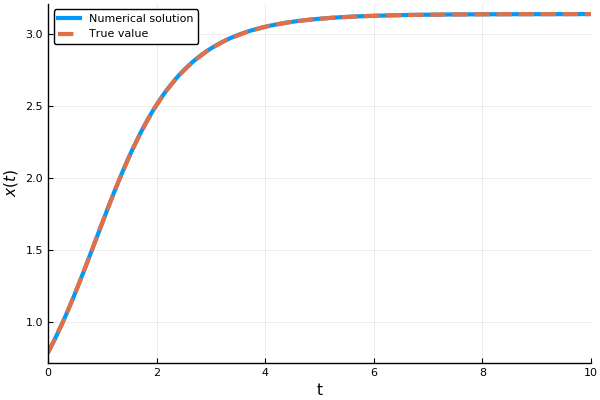

In [94]:
# The API demands to create a three-variable function for the LHS of the
# ODE problem
h(x, p, t) = sin(x)
# Define the initial conditions
x0 = pi/4
# Create a tuple for the time span
tspan = (0.0, 10.0)
# Create and ODEProblem as defined in the documentation
prob = ODEProblem(h, x0, tspan)
# Solve the problem
sol = DifferentialEquations.solve(prob, reltol=1e-8, abstol=1e-8)
# Plot the results
plot(sol, lab = "Numerical solution", ylabel=L"x(t)")
# Define the analytical solution and plot it as well
true_val(x) = 2.0*atan(exp(x)/(sqrt(2)+1))
plot!(sol.t, true_val.(sol.t), lw=3, ls=:dash, lab = "True value")

We may not have the analytical expression with this approach, but it is amazing how precise it is (but don't forget we are skipping over the approximation errors).

I think this approach is more beautiful in a sense, we may not know anything about the problem, it might be even hard (or impossible) to solve analytically, but numerical analysis never fails, and `DifferentialEquations.jl` is actually a very mature, fast and performant library. This will be our workhorse throughout the entire journey.

In closing, instead of doing the analytical evaluation of the limit, have a closer look at the plot.

Can you see that, as time passes by, $x(t)$ approaches the value of $\pi$?

And it's not even in a very long period of time, you can actually see the value of pi being steady as quick as when $t = 6.$ If we only knew how to code we need only the problem and the initial conditions and by looking at the graph everything would be clear, we would have all the information we needed without even knowing Calculus!